In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [2]:

mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


train_images, test_images = train_images / 255.0, test_images / 255.0


In [3]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),   
    layers.Dense(128, activation='relu'),   
    layers.Dropout(0.2),                    
    layers.Dense(10, activation='softmax')
])


In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2970 - accuracy: 0.9130
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1426 - accuracy: 0.9585
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1054 - accuracy: 0.9683
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0855 - accuracy: 0.9735
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0738 - accuracy: 0.9769


In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc * 100:.2f}%')


313/313 - 1s - loss: 0.0750 - accuracy: 0.9779 - 730ms/epoch - 2ms/step
Test accuracy: 97.79%


313/313 [==============================] - 1s 2ms/step


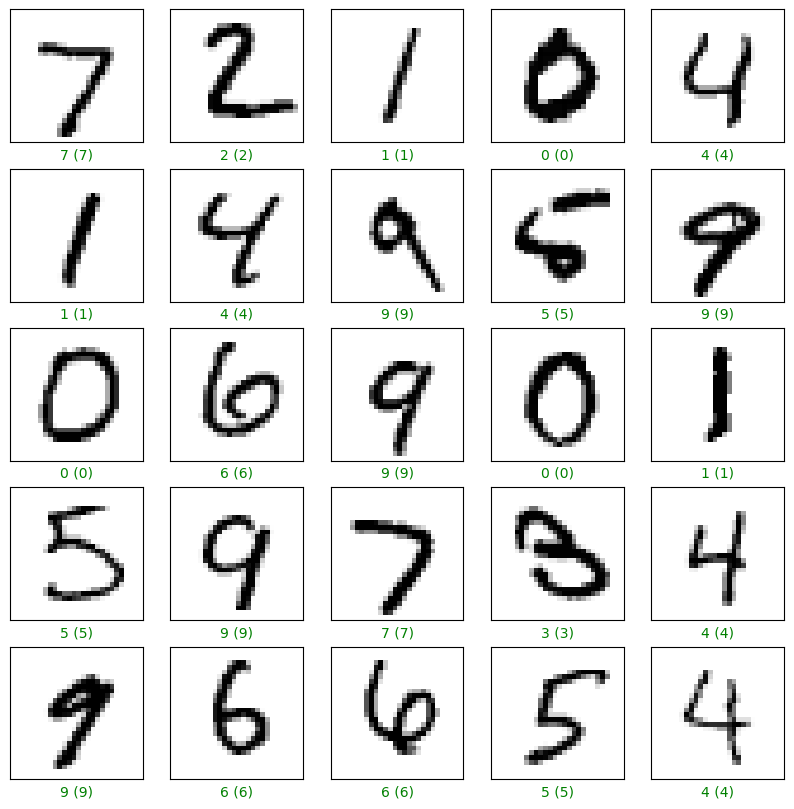

In [7]:
predictions = model.predict(test_images)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = predictions[i].argmax()
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f'{predicted_label} ({true_label})', color=color)
plt.show()
